In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Study data files
data_path = "Project 1 Canada.csv"

# Read the data 
#Due to errors on row 8 (which had no value assigned), we had to skip this specific row in order to read the file
data_df = pd.read_csv(data_path, encoding='utf-8', skiprows=8)



# Display the data table for preview
data_df.head()


,Unnamed: 0,Geography,Canada 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Characteristics,"Income, consumption and savings",2018,Symbol,2019,Symbol,2020,Symbol,2021,Symbol,2022,Symbol
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All households,Household disposable income,"1,224,919",NaN,"1,280,362",NaN,"1,387,360",NaN,"1,444,569",NaN,"1,519,006",NaN
4,NaN,Compensation of employees,"1,122,304",NaN,"1,168,597",NaN,"1,155,842",NaN,"1,264,592",NaN,"1,384,419",NaN


In [2]:
#Drop what is not relevant:
data_df = data_df.drop(["Unnamed: 0"], axis = 1)
data_df = data_df.drop(["Unnamed: 3"], axis = 1)
data_df = data_df.drop(["Unnamed: 5"], axis = 1)
data_df = data_df.drop(["Unnamed: 7"], axis = 1)
data_df = data_df.drop(["Unnamed: 9"], axis = 1)
data_df = data_df.drop(["Unnamed: 11"], axis = 1)

#Reset index
data_df = data_df.reset_index(drop=True)

#Rename main column
data_df = data_df.rename(columns={"Geography":"Categories"})

data_df = data_df.replace({'\$': '', ',': ''}, regex=True)

#Display the data table
data_df.head()


,Categories,Canada 1,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Income consumption and savings,2018,2019,2020,2021,2022
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Household disposable income,1224919,1280362,1387360,1444569,1519006
4,Compensation of employees,1122304,1168597,1155842,1264592,1384419


In [3]:
data_df= data_df.drop([0, 1, 2, 36, 37, 38, 39,40,41,42,43,44,45,46])

In [4]:
data_df
data_df = data_df.set_index("Categories")

In [5]:
data2_df = data_df.rename(columns = {"Canada 1": "Canada 2018",'Unnamed: 4':"Canada 2019",'Unnamed: 6':"Canada 2020","Unnamed: 8":"Canada 2021",'Unnamed: 10':"Canada 2022"})
data2_df.head()

,Canada 2018,Canada 2019,Canada 2020,Canada 2021,Canada 2022
Categories,,,,,
Household disposable income,1224919,1280362,1387360,1444569,1519006
Compensation of employees,1122304,1168597,1155842,1264592,1384419
Net mixed income,195618,207999,207211,217267,238710
Property income received,202278,217587,212221,215883,241663
Less: property income paid,70213,79808,72579,66922,85259


In [6]:
data_df.dtypes
data2_df.astype(int)
data2_df = data2_df.replace({'\$': '', ',': ''}, regex=True).astype(int)
data2_df = data2_df.div(10).round(2)


In [7]:
#Plot income,debts,savings.
# Create a variable 
Income = "Adjusted household disposable income"
Consumption = "Household final consumption expenditure (HFCE)"
Saving = "Household net saving"

In [8]:
Household_income = data2_df.loc[Income,
                                                ["Canada 2018",
                                                "Canada 2019",
                                                "Canada 2020",
                                                "Canada 2021", 
                                                "Canada 2022"]]

Household_consumption = data2_df.loc[Consumption,
                                                ["Canada 2018",
                                                "Canada 2019",
                                                "Canada 2020",
                                                "Canada 2021", 
                                                "Canada 2022"]]

Household_saving = data2_df.loc[Saving,
                                                ["Canada 2018",
                                                "Canada 2019",
                                                "Canada 2020",
                                                "Canada 2021", 
                                                "Canada 2022"]]

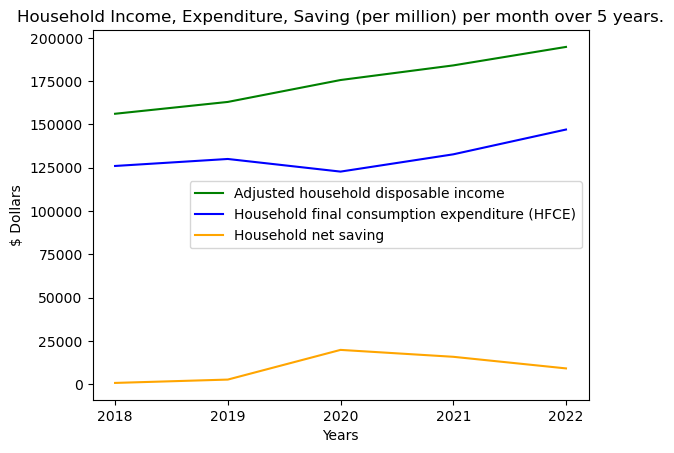

In [9]:
# Create a list of the years that we will use as our x axis
years = [2018,2019,2020,2021,2022]

#plot income
plt.plot(years, Household_income , color="green", label=Income)

# Plot consumption
plt.plot(years, Household_consumption , color="blue", label=Consumption)

# Plot saving
plt.plot(years, Household_saving , color="orange", label=Saving)

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")


plt.xlabel("Years")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))

plt.ylabel("$ Dollars")
plt.title("Household Income, Expenditure, Saving (per million) per month over 5 years.")

# Print our chart to the screen
plt.savefig("Household_inc_sav_exp.png")
plt.show()

In [10]:
file_path = "./Project 1 debt Dataset .csv"
debt_df = pd.read_csv(file_path, encoding='utf-8')
debt_df.head()

,"Credit liabilities of households (x 1,000,000)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146
0,Frequency: Monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table: 36-10-0639-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Release date: 2023-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Geography: Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
debt_df.columns = debt_df.iloc[9]
debt_df = debt_df.drop(9)
#Rename main column
debt_df = debt_df.rename(columns={"Credit liabilities of households 1 2 3":"Credit liabilities of households"})

#Set new index as categories
debt_df = debt_df.set_index("Credit liabilities of households")
debt_df = debt_df.drop(["Symbol"], axis = 1)
debt_df = debt_df.dropna()
debt_df


9,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,...,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23
Credit liabilities of households,,,,,,,,,,,,,,,,,,,,,
Non-mortgage loans,"667,394","670,454","674,522","676,412","678,617","680,292","682,900","684,360","685,264","686,148",...,"712,921","716,427","718,006","718,198","720,740","722,009","724,565","726,021","727,427","728,490"
Chartered banks 1,"477,815","478,637","480,074","480,897","481,949","482,892","484,197","484,128","484,079","484,659",...,"505,393","509,029","510,676","510,787","512,971","514,129","516,436","517,787","519,439","519,962"
Personal loans 1 2,"99,313","99,610","99,999","100,469","100,856","101,099","101,503","101,496","101,700","102,325",...,"118,186","118,644","118,780","118,785","119,078","119,667","120,160","120,378","120,732","120,982"
Of which: Auto loans 1 2,"76,929","77,288","77,723","78,235","78,700","79,243","79,239","79,710","80,083","80,526",...,"93,003","93,505","93,739","93,662","94,060","94,775","95,233","95,620","95,949","96,467"
Credit cards 1 2,"81,040","81,261","81,426","81,781","81,868","81,966","82,160","82,210","82,377","82,516",...,"84,265","85,595","86,157","86,638","87,537","88,660","90,079","90,639","91,413","92,324"
Lines of credit 1 2 4,"246,554","246,848","247,602","248,041","248,800","249,610","250,168","249,961","249,586","249,325",...,"226,399","228,012","228,882","229,054","229,766","229,649","229,710","229,717","229,873","230,299"
"Lines of credit, of which: excluding home equity lines of credit 1 2","70,991","71,068","71,305","71,371","71,526","71,718","71,582","71,707","71,453","71,646",...,"65,332","66,054","66,585","66,817","67,232","67,344","67,561","67,717","67,906","68,112"
Other personal loans 1 2,"20,026","20,217","20,308","20,426","20,662","20,908","21,030","21,239","21,251","21,154",...,"32,067","31,855","31,669","31,401","31,536","31,108","30,697","30,406","30,267","29,695"
Unincorporated business 1 2,"30,882","30,701","30,739","30,180","29,763","29,309","29,336","29,222","29,165","29,339",...,"44,476","44,923","45,188","44,909","45,054","45,045","45,790","46,647","47,154","46,662"


In [12]:
debt_df = debt_df.replace({'\$': '', ',': ''}, regex=True).astype("int64")
debt_df

9,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,...,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23
Credit liabilities of households,,,,,,,,,,,,,,,,,,,,,
Non-mortgage loans,667394,670454,674522,676412,678617,680292,682900,684360,685264,686148,...,712921,716427,718006,718198,720740,722009,724565,726021,727427,728490
Chartered banks 1,477815,478637,480074,480897,481949,482892,484197,484128,484079,484659,...,505393,509029,510676,510787,512971,514129,516436,517787,519439,519962
Personal loans 1 2,99313,99610,99999,100469,100856,101099,101503,101496,101700,102325,...,118186,118644,118780,118785,119078,119667,120160,120378,120732,120982
Of which: Auto loans 1 2,76929,77288,77723,78235,78700,79243,79239,79710,80083,80526,...,93003,93505,93739,93662,94060,94775,95233,95620,95949,96467
Credit cards 1 2,81040,81261,81426,81781,81868,81966,82160,82210,82377,82516,...,84265,85595,86157,86638,87537,88660,90079,90639,91413,92324
Lines of credit 1 2 4,246554,246848,247602,248041,248800,249610,250168,249961,249586,249325,...,226399,228012,228882,229054,229766,229649,229710,229717,229873,230299
"Lines of credit, of which: excluding home equity lines of credit 1 2",70991,71068,71305,71371,71526,71718,71582,71707,71453,71646,...,65332,66054,66585,66817,67232,67344,67561,67717,67906,68112
Other personal loans 1 2,20026,20217,20308,20426,20662,20908,21030,21239,21251,21154,...,32067,31855,31669,31401,31536,31108,30697,30406,30267,29695
Unincorporated business 1 2,30882,30701,30739,30180,29763,29309,29336,29222,29165,29339,...,44476,44923,45188,44909,45054,45045,45790,46647,47154,46662


In [13]:
debt_df.columns

Index(['Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17',
       'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 'Jan-18', 'Feb-18',
       'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18',
       'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20',
       'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21',
       'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21',
       'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
       'Apr-22', 'May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22',
       'Nov-22', 'Dec-22', 'Jan-23'],
      dtype='object', name=9)

In [14]:
debt_df=debt_df.div(10)

In [15]:
# Create a variable 
Total_debt = "Total credit liabilities of households"
Households_debt = debt_df.loc[Total_debt,
                                                ['Jan-18', 'Feb-18',
       'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18',
       'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20',
       'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21',
       'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21',
       'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
       'Apr-22', 'May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22',
       'Nov-22', 'Dec-22', 'Jan-23']]


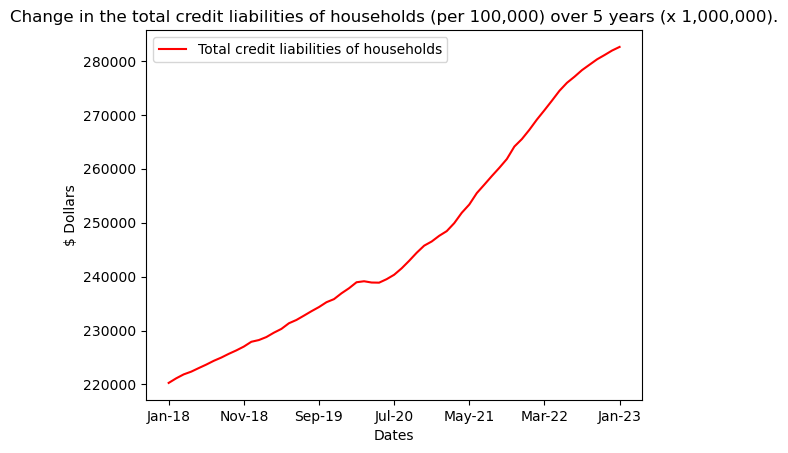

In [16]:
#plot Total debt
Households_debt.plot(color="red", label= Total_debt)

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")


plt.xlabel("Dates")
spacing = 0.100

plt.ylabel("$ Dollars")
plt.title("Change in the total credit liabilities of households (per 100,000) over 5 years (x 1,000,000).")

# Print our chart to the screen
plt.savefig("total_credit_liabilities.png")
plt.show()


In [17]:
debt_1 = "Chartered banks 1"
Chartered_banks_1 = debt_df.loc[debt_1,
                              ['Jan-18', 'Jan-19',  'Jan-20',  'Jan-21', 'Jan-22', 'Jan-23']]
debt_2 = "Personal loans 1 2"
Personal_loans = debt_df.loc[debt_2,
                              ['Jan-18', 'Jan-19',  'Jan-20',  'Jan-21', 'Jan-22', 'Jan-23']]
debt_3 = "Of which: Auto loans 1 2"
Auto_loans = debt_df.loc[debt_3,
                              ['Jan-18', 'Jan-19',  'Jan-20',  'Jan-21', 'Jan-22', 'Jan-23']]
debt_4 = "Credit cards 1 2"
Credit_cards = debt_df.loc[debt_4,
                              ['Jan-18', 'Jan-19',  'Jan-20',  'Jan-21', 'Jan-22', 'Jan-23']]
debt_5 = "Lines of credit 1 2 4"
Line_ofcredit = debt_df.loc[debt_5,
                              ['Jan-18', 'Jan-19',  'Jan-20',  'Jan-21', 'Jan-22', 'Jan-23']]
debt_6 = "Mortgage loans"
Mortgage_loans = debt_df.loc[debt_6,
                              ['Jan-18', 'Jan-19',  'Jan-20',  'Jan-21', 'Jan-22', 'Jan-23']]




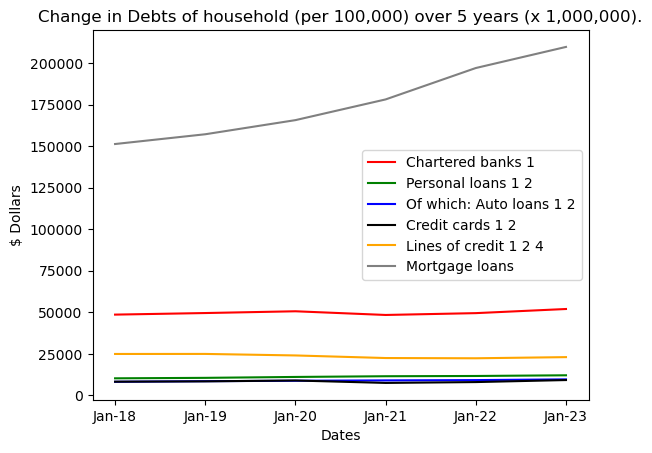

In [18]:
# Create a list of the years that we will use as our x axis
years = [2018,2019,2020,2021,2022]

Chartered_banks_1.plot(color="red", label= debt_1)
Personal_loans.plot(color="green", label= debt_2)
Auto_loans.plot(color="blue", label= debt_3)
Credit_cards.plot(color="black", label= debt_4)
Line_ofcredit.plot(color="orange", label= debt_5)
Mortgage_loans.plot(color="grey", label= debt_6)
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.xlabel("Dates")
spacing = 0.100

plt.ylabel("$ Dollars")
plt.title("Change in Debts of household (per 100,000) over 5 years (x 1,000,000).")

# Print our chart to the screen
plt.savefig("Debts_Household.png")
plt.show()

In [19]:
### Area Chart

# Import csv
data = "Project 1 Ontario.csv"

# Read csv 

Data_df = pd.read_csv(data, encoding='utf-8', skiprows=8)

# Data organizing, tidying.

Data_On = pd.DataFrame(Data_df)

#set the datatype of csv and remove special characters
Ontario_df = Data_On.replace(',', '', regex=True)


# Display the data table for preview
Ontario_df.head()

,Unnamed: 0,Geography,Ontario 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Statistics,Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Characteristics,Income consumption and savings,2017,Symbol,2018,Symbol,2019,Symbol,2020,Symbol,2021,Symbol,2022,Symbol
2,NaN,NaN,Dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All households,Household disposable income,457842,NaN,477970,NaN,499270,NaN,545724,NaN,568267,NaN,602454,NaN
4,NaN,Compensation of employees,418898,NaN,445885,NaN,464075,NaN,463841,NaN,506817,NaN,561909,NaN


In [20]:
#Drop what is not relevant:
Ontario_df= Ontario_df.drop([0, 1, 2, 36, 37, 38, 39])
Ontario_df = Ontario_df.drop(["Unnamed: 0"], axis = 1)
Ontario_df = Ontario_df.drop(["Unnamed: 3"], axis = 1)
Ontario_df = Ontario_df.drop(["Unnamed: 5"], axis = 1)
Ontario_df = Ontario_df.drop(["Unnamed: 7"], axis = 1)
Ontario_df = Ontario_df.drop(["Unnamed: 9"], axis = 1)
Ontario_df = Ontario_df.drop(["Unnamed: 11"], axis = 1)
Ontario_df = Ontario_df.drop(["Unnamed: 13"], axis = 1)

#Reset index
Ontario_df = Ontario_df.reset_index(drop=True)

#Rename main column
Ontario_df = Ontario_df.rename(columns={"Geography":"Categories"})

Ontario_df = Ontario_df.set_index("Categories")
Ontario_df = Ontario_df.rename(columns = {"Ontario 1": "Ontario 2018",'Unnamed: 4':"Ontario 2019",'Unnamed: 6':"Ontario 2020","Unnamed: 8":"Ontario 2021",'Unnamed: 10':"Ontario 2022","Unnamed: 12":"Ontario Jan 2023"})
Ontario_df.astype(int)

Ontario_df.head()

,Ontario 2018,Ontario 2019,Ontario 2020,Ontario 2021,Ontario 2022,Ontario Jan 2023
Categories,,,,,,
Household disposable income,457842,477970,499270,545724,568267,602454
Compensation of employees,418898,445885,464075,463841,506817,561909
Net mixed income,69078,71478,76718,75579,80230,87575
Property income received,79247,80380,87401,85761,88086,99033
Less: property income paid,25721,30259,35130,32723,30871,39358


In [21]:
Ontario_plot = Ontario_df.loc[["Adjusted household disposable income","Household final consumption expenditure (HFCE)"],:]

In [22]:
Ontario_plot = Ontario_plot.astype(int)
ontario_chart= Ontario_plot.transpose()
ontario_chart


Categories,Adjusted household disposable income,Household final consumption expenditure (HFCE)
Ontario 2018,580515,474576
Ontario 2019,605942,497090
Ontario 2020,631295,516075
Ontario 2021,684941,470560
Ontario 2022,718436,500736
Ontario Jan 2023,763086,557512


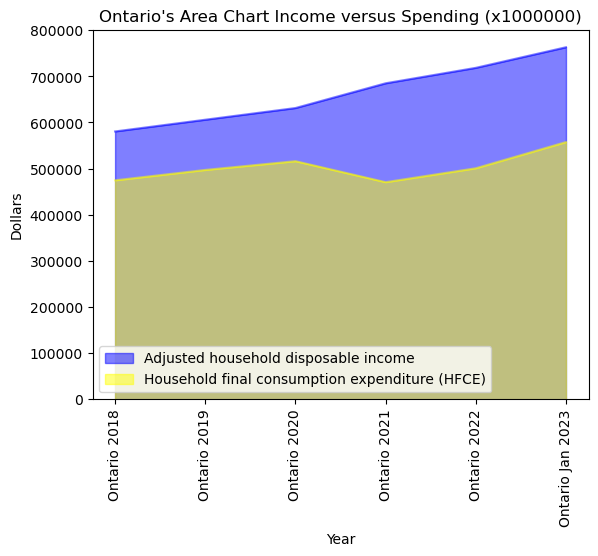

In [23]:
ontario_chart.plot(kind="area",stacked=False, color=['blue', 'yellow'])
plt.legend(loc="best")
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Dollars')
plt.title("Ontario's Area Chart Income versus Spending (x1000000)")

plt.savefig("Ontario's income,spending.png")
plt.show()

In [24]:
Ontario_saving= Ontario_df.loc[["Household net saving"],:]
Ontario_saving = Ontario_saving.astype(int)
ontario_sav= Ontario_saving.transpose()
ontario_sav

Categories,Household net saving
Ontario 2018,-3213
Ontario 2019,-5929
Ontario 2020,-1730
Ontario 2021,86898
Ontario 2022,80455
Ontario Jan 2023,58339


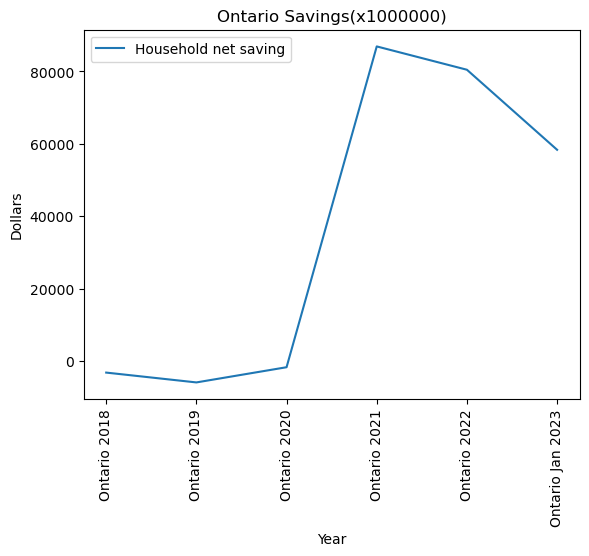

In [25]:
ontario_sav.plot()
plt.legend(loc="best")
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Dollars')
plt.title("Ontario Savings(x1000000)")

plt.savefig("Ontario Savings.png")
plt.show()